In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

## Predicting numerical values: Linear Regression

In [37]:
import statsmodels.api as sm

In [3]:
from sklearn import datasets ## imports datasets from scikit-learn
data = datasets.load_boston() ## loads Boston dataset from datasets library 

In [4]:
print(data.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

### Let's define the predictors

In [5]:
boston_predictors = pd.DataFrame(data.data, columns=data.feature_names)
boston_predictors.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### Let's define the target

In [6]:
# Put the target (housing value -- MEDV) in another DataFrame
boston_target = pd.DataFrame(data.target, columns=["MEDV"])
boston_target.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### Let's start with one predictor..

In [7]:
one_predictor = boston_predictors[['LSTAT']]
boston_target = boston_target['MEDV']

### Let's split into training and testing sets

In [8]:
# Training set: everything except the last 20
one_predictor_train = one_predictor[:-20]
boston_target_train = boston_target[:-20]

# Testing set: the last 20 for testing our model
one_predictor_test = one_predictor[-20:]
boston_target_test = boston_target[-20:]

In [9]:
# Create linear regression object
lm = linear_model.LinearRegression()

# Train the model using the training sets
model = lm.fit(one_predictor_train, boston_target_train)

In [10]:
# This is thre R-squared of the model
lm.score(one_predictor_train, boston_target_train)

0.54707562749040672

In [11]:
predictions = lm.predict(one_predictor_test)

In [12]:
pred_vs_actual = pd.DataFrame({'prediction':predictions, 'actual':boston_target_test, 'difference': abs(predictions-boston_target_test)})

In [13]:
pred_vs_actual

,prediction,actual,difference
486,20.406449,19.1,1.306449
487,23.784398,20.6,3.184398
488,17.459118,15.2,2.259118
489,11.803685,7.0,4.803685
490,6.339638,8.1,1.760362
491,17.449548,13.6,3.849548
492,21.966239,20.1,1.866239
493,23.248519,21.8,1.448519
494,21.736576,24.5,2.763424
495,17.899303,23.1,5.200697


In [16]:
x_axis = one_predictor_test[['LSTAT']].values.flatten()

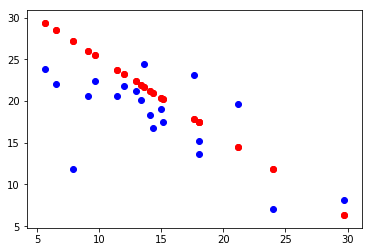

In [18]:
# Plot data, regression line
plt.figure(2)
plt.scatter(x_axis, predictions, color='r')
plt.scatter(x_axis, boston_target_test, color='b')
plt.show()

### Let's add more predictors to the model..

In [19]:
many_predictors = boston_predictors[['LSTAT', 'NOX', 'CRIM', 'AGE', 'RM', 'NOX']]

### Let's retrain the model with the new variables..

In [20]:
many_predictors_train = many_predictors[:-20]
many_predictors_test = many_predictors[-20:]

# Train the model using the training sets
better_model = lm.fit(many_predictors_train, boston_target_train)

# This is thre R-squared of the model
lm.score(many_predictors_train, boston_target_train)

0.65213959211293404

In [21]:
better_predictions = lm.predict(many_predictors_test)
pred_vs_actual = pd.DataFrame({'prediction':better_predictions, 'actual':boston_target_test, 'difference': abs(better_predictions-boston_target_test)})
pred_vs_actual

,prediction,actual,difference
486,20.273483,19.1,1.173483
487,20.800824,20.6,0.200824
488,15.832526,15.2,0.632526
489,12.037057,7.0,5.037057
490,6.790798,8.1,1.309202
491,18.661774,13.6,5.061774
492,21.225327,20.1,1.125327
493,19.934022,21.8,1.865978
494,19.702476,24.5,4.797524
495,15.494844,23.1,7.605156


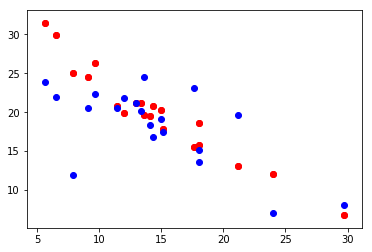

In [23]:
# Plot data, regression line
plt.figure(2)
plt.scatter(x_axis, better_predictions, color='r')
plt.scatter(x_axis, boston_target_test, color='b')
plt.show()

## Predicting probabilities of something happening: Logistic Regression

In [24]:
import matplotlib
import numpy as np
import pylab as plab
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from sklearn import datasets, linear_model

In [25]:
titanic_train = pd.read_csv("titanic_train.csv")
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
2,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
3,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
4,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [26]:
#Clean the data for missing values (NaN) in Cabin
char_cabin = titanic_train["Cabin"].astype(str)     # Convert cabin to str
new_Cabin = np.array([cabin[0] for cabin in char_cabin]) # Take first letter
titanic_train["Cabin"] = pd.Categorical(new_Cabin)  # Save the new cabin var

In [27]:
# Impute median Age (28) for missing (NA) Age values
new_age_var = np.where(titanic_train["Age"].isnull(), # Logical check
                       28,                            # Value if check is true
                       titanic_train["Age"])          # Value if check is false

titanic_train["Age"] = new_age_var 

### Use the Logistic Regression Algorithm to train the model..

In [28]:
from sklearn import linear_model
from sklearn import preprocessing

# Initialize label encoder
label_encoder = preprocessing.LabelEncoder()

# Convert Sex variable to numeric
encoded_sex = label_encoder.fit_transform(titanic_train["Sex"])

In [29]:
# Initialize logistic regression model
log_model = linear_model.LogisticRegression()

# Train the model
log_model.fit(X = pd.DataFrame(encoded_sex), 
              y = titanic_train["Survived"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
predictions = pd.Series(log_model.predict(X=pd.DataFrame(encoded_sex)))
predictions.name = "Predicted"

# Generate table of predictions vs actual
pd.crosstab(predictions,titanic_train["Survived"])

Survived,0,1
Predicted,,
0,288,73
1,58,160


In [31]:
# Generate table of predictions vs Sex
pd.crosstab(titanic_train["Sex"], predictions)

Predicted,0,1
Sex,,
female,0,218
male,361,0


In [32]:
# Convert more variables to numeric
encoded_class = label_encoder.fit_transform(titanic_train["Pclass"])
encoded_cabin = label_encoder.fit_transform(titanic_train["Cabin"])

In [33]:
train_features = pd.DataFrame([encoded_class,
                              encoded_cabin,
                              encoded_sex,
                              titanic_train["Age"]]).T

# Initialize logistic regression model
log_model = linear_model.LogisticRegression()

# Train the model
log_model.fit(X = train_features ,
              y = titanic_train["Survived"])


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [34]:
# Make predictions
preds = pd.Series(log_model.predict(X=train_features))
preds.name = "Predicted"

# Generate table of predictions vs actual
pd.crosstab(preds,titanic_train["Survived"])

Survived,0,1
Predicted,,
0,282,60
1,64,173


In [35]:
# Generate table of predictions vs Sex
pd.crosstab(titanic_train["Sex"], preds)

Predicted,0,1
Sex,,
female,9,209
male,333,28


In [36]:
# Generate table of predictions vs Sex
pd.crosstab(titanic_train["Sex"], titanic_train["Survived"])

Survived,0,1
Sex,,
female,58,160
male,288,73


### There is hope for men! :) :)